In [1]:
import pandas as pd

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 로드

### 1. 농산물 가격 데이터

In [87]:
apple_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/apple_data.csv",encoding='cp949')
pear_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/pear_data.csv",encoding='cp949')
persimmon_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/persimmon_data.csv",encoding='cp949')
spinach_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/spinach_data.csv",encoding='cp949')
moo_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/mooooo_data.csv",encoding='cp949')
pumpkin_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/babypumpkin_data.csv",encoding='cp949')

In [88]:
spinach_data[spinach_data['date']=='2023-05-25']

,date,holiday,temp,temp_range,prec,mean_wind,max_inst_wind,name,species,product grade,price,discount,etl time
15935,2023-05-25,0,18.7,8.5,NaN,1.1,6.2,시금치,시금치,상품,480.0,N,2.024010e+13
15936,2023-05-25,0,18.7,8.5,NaN,1.1,6.2,시금치,시금치,상품,520.0,N,2.024010e+13
15937,2023-05-25,0,18.7,8.5,NaN,1.1,6.2,시금치,시금치,상품,620.0,Y,2.024010e+13
15938,2023-05-25,0,18.7,8.5,NaN,1.1,6.2,시금치,시금치,상품,570.0,N,2.024010e+13
15939,2023-05-25,0,18.7,8.5,NaN,1.1,6.2,시금치,시금치,상품,620.0,Y,2.024010e+13
15940,2023-05-25,0,18.7,8.5,NaN,1.1,6.2,시금치,시금치,상품,790.0,N,2.024010e+13
15941,2023-05-25,0,18.7,8.5,NaN,1.1,6.2,시금치,시금치,상품,1050.0,N,2.024010e+13


- 시금치는 2023년 5월 25일부터 1kg에서 100g으로 조사 단위가 바뀌었으므로 1kg로 단위를 맞춰줌

In [89]:
for idx in range(len(spinach_data)):
    if idx >= 15935:
        spinach_data.loc[idx, 'price'] = spinach_data.loc[idx, 'price'] * 10

- 필요한 컬럼만 추출
- 결측치가 안 채워진 (선형 보간되지 않은) 데이터를 사용

In [90]:
apple_data = apple_data[~apple_data.price.isnull()][['date','name','species','product grade','price']]
pear_data = pear_data[~pear_data.price.isnull()][['date','name','species','product grade','price']]
persimmon_data = persimmon_data[~persimmon_data.price.isnull()][['date','name','species','product grade','price']]
spinach_data = spinach_data[~spinach_data.price.isnull()][['date','name','species','product grade','price']]
moo_data = moo_data[~moo_data.price.isnull()][['date','name','species','product grade','price']]
pumpkin_data = pumpkin_data[~pumpkin_data.price.isnull()][['date','name','species','product grade','price']]

- 데이터셋을 확인한 결과, 쓰가루(아오리)와 쓰가루가 같아서 하나로 통일함

In [91]:
apple_data['species'] = apple_data['species'].apply(lambda x: '쓰가루' if x == '쓰가루(아오리)' else x)

### 2. 날씨 데이터

In [92]:
apple_weather_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/apple_weather_data.csv",encoding='cp949')
pear_weather_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/pear_weather_data.csv",encoding='cp949')[:3287]
persimmon_weather_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/persimmon_weather_data.csv",encoding='cp949')
spinach_weather_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/spinach_weather_data.csv",encoding='cp949')
moo_weather_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/moo_weather_data.csv",encoding='cp949')
pumpkin_weather_data = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/pumpkin_weather_data.csv",encoding='cp949')[:3287]

- 컬럼명 바꾸기

In [93]:
apple_weather_data.columns = ['date', 'temp', 'temp_range', 'prec', 'mean_wind', 'max_inst_wind']
persimmon_weather_data.columns = ['date', 'temp', 'temp_range', 'prec', 'mean_wind', 'max_inst_wind']
moo_weather_data.columns = ['date', 'temp', 'temp_range', 'prec', 'mean_wind', 'max_inst_wind']
pumpkin_weather_data.columns = ['date', 'temp', 'temp_range', 'prec', 'mean_wind', 'max_inst_wind']

pear_weather_data.columns = ['date', 'temp', 'temp_range', 'mean_wind', 'max_inst_wind', 'prec']
spinach_weather_data.columns = ['date', 'temp', 'temp_range', 'mean_wind', 'max_inst_wind', 'prec']

In [94]:
pear_weather_data = pear_weather_data[['date', 'temp', 'temp_range', 'prec', 'mean_wind', 'max_inst_wind']]
spinach_weather_data = spinach_weather_data[['date', 'temp', 'temp_range', 'prec', 'mean_wind', 'max_inst_wind']]

- date의 type을 날짜로 변환

In [95]:
apple_weather_data['date'] = pd.to_datetime(apple_weather_data['date'])
pear_weather_data['date'] = pd.to_datetime(pear_weather_data['date'])
persimmon_weather_data['date'] = pd.to_datetime(persimmon_weather_data['date'])
spinach_weather_data['date'] = pd.to_datetime(spinach_weather_data['date'])
moo_weather_data['date'] = pd.to_datetime(moo_weather_data['date'])
pumpkin_weather_data['date'] = pd.to_datetime(pumpkin_weather_data['date'])

### 3. 공휴일 데이터

In [69]:
holiday = pd.read_csv("/content/drive/MyDrive/통계최강자전/data/holiday_df.csv",encoding='cp949').groupby('date').first()[4:]
holiday.index = pd.to_datetime(holiday.index)

## 전처리 함수 작성

전처리 순서  
1. 하루에 하나의 가격이 대응되도록, 하루에 기록된 가격들의 중앙값을 찾아줌
2. 가격을 일주일 단위로 묶기 위해, 7일치 가격의 평균값을 찾아줌

1번 방식의 기준 - mixture 분포  
- 전: 하루에 여러 품종이 판매되었을 경우, 하나의 품종을 딱 지정해 그 품종의 가격들의 중앙값을 찾음  
- 후: 품종에 관계없이 하루에 기록된 모든 가격들의 중앙값을 찾아줌

일자별 중앙값 찾기

- 이때 일자별로 어떤 '품종'의 가격이 매핑되었는지를 알기 위해 그 중앙값에 대응하는 품종까지 찾아주도록 하였음  
- 중앙값에 대응하는 품종이 여러 개 있으면 품종의 최빈값을 찾아줌, 이마저 동점이면 홍로 > 쓰가루 > 후지 순서로 우선순위를 가짐  

그룹핑 기준  
- 일주일 단위로 묶는다면, 7일치 가격들의 평균값으로 입력
- 일주일 단위로 묶어주기 위해 데이터가 월요일부터 시작되도록 함
- 통일성을 위해 일별로 묶어줄 때도 데이터가 월요일부터 시작되도록 함

In [50]:
# 중앙값을 구할 때 두 값 중 더 큰 값을 반환
def custom_median(data):
    # price 열을 받아 오름차순 정렬
    sorted_series = data['price'].sort_values()
    n = len(sorted_series)

    if n % 2 == 0:
        return sorted_series.iloc[n//2]    # 짝수일 때는 두 중앙값 중 더 큰 값
    else:
        return sorted_series.median()      # 홀수일 때는 일반 중앙값

# 일자별 중앙값을 찾아 데이터프레임 반환
def preprocess_price(data, grade, option):

    # 품목의 등급 선택
    if (grade == '상품') | (grade == '중품'):
        data = data[(data['product grade']==grade)]
    else:
        print("품종을 지정해주세요.")
        return None

    def grouping_by_date(data):

        # 검색할 데이터프레임: data
        # 출력할 데이터프레임: time_series_data

        # 일자별 중앙값 찾기, 이때 데이터가 짝수 개 있으면 두 중앙값 중 더 큰 값으로 찾기
        time_series_data = data.groupby('date',as_index=False)[['price']].apply(custom_median)

        # 일자별 중앙값에 대응하는 품종을 입력해주기 위한 빈 컬럼 생성
        time_series_data['species'] = None

        try:
            for idx in range(len(time_series_data)):
                median_date = time_series_data.loc[idx,'date'].iloc[0]
                median_price = time_series_data.loc[idx,'price'].iloc[0]

                # 원본 데이터프레임에서 중앙값에 대응하는 행을 찾기
                median_rows = data[(data['date'] == median_date) & (data['price'] == median_price)]

                # 그 행에서 품종을 찾아 입력, 이때 중앙값에 대응하는 행이 여러 개이면 품종의 최빈값을 입력
                # 최빈값이 동점일 경우 홍로 > 쓰가루 > 후지 순으로 우선순위 설정

                if len(median_rows['species'].mode()) == 3:
                    time_series_data.loc[idx, 'species'] = '홍로'
                elif len(median_rows[median_rows['species'] != '후지']['species'].mode()) == 2:
                    time_series_data.loc[idx, 'species'] = '홍로'
                elif len(median_rows[median_rows['species'] != '후지']['species'].mode()) == 1:
                    time_series_data.loc[idx, 'species'] = median_rows[median_rows['species'] != '후지']['species'].mode().iloc[0]
                else:
                    time_series_data.loc[idx, 'species'] = '후지'

            # 기타 전처리
            time_series_data.columns = time_series_data.columns.get_level_values(0)
            time_series_data['date'] = pd.to_datetime(time_series_data['date'])
            time_series_data.set_index('date',inplace=True)

            return time_series_data[1:]   # 1월 2일은 제외

        except Exception as e:
              print(e)

    if option == '일':
          return grouping_by_date(data)
    elif option == '주':
          return grouping_by_date(data)['price'].resample('W').mean()
    else:
        print("옵션을 지정해주세요.")
        return None

### 2. 날씨 데이터 전처리

- 하나의 날씨 변수 컬럼을 7개로 늘림
- 7일 단위로 묶을 때, 매일매일의 날씨 데이터를 월요일 ~ 일요일 날씨 변수 컬럼에 각각 다시 입력시켜줌
- 나중에 7일치 날씨의 통계량, 이동평균 등 파생변수를 만들어도 될 듯

In [52]:
# 일주일 단위로 묶기 위한 작업
def group_weekly(df):
    # 새로 만들 데이터프레임을 저장할 리스트
    weekly_data = []

    # 일주일 단위로 7개씩 슬라이싱하여 처리
    for i in range(0, len(df), 7):
        group = df.iloc[i:i+7].reset_index(drop=True)

        # 마지막 날짜로 대표 날짜를 선택
        last_date = group['date'].iloc[-1]

        # 딕셔너리 생성
        result = {'date': last_date}

        # 컬럼 이름과 시간 범위
        columns = ['temp', 'temp_range', 'prec', 'mean_wind', 'max_inst_wind']

        # 각 컬럼에 대해 t-6부터 t까지의 값을 반복적으로 추가
        for col in columns:
            for i in range(6, -1, -1):
                result[f'{col}_t-{i}' if i > 0 else f'{col}_t'] = group[col].iloc[6 - i]

        # 리스트에 추가
        weekly_data.append(result)

    # 리스트를 새로운 데이터프레임으로 변환
    expanded_df = pd.DataFrame(weekly_data)

    return expanded_df

- 강수량 더미변수화
- 일주일 단위로 묶어주기 위해 데이터가 월요일부터 시작되도록 함, 2015년 1월 5일 월요일부터 보자

In [59]:
def preprocess_weather(data, option):
    # 2015년 1월 5일부터 시작
    data = data[4:].reset_index(drop=True)

    # 강수량 결측치를 0으로 채우기
    data['prec'] = data['prec'].fillna(0)

    # 강수량 범주화
    def categorize_precipitation(prec):
        if prec >= 80:
            return 'high'     # 1시간 강수량이 80mm 이상일 경우, reference group
        elif prec >= 30:
            return 'medium'   # 1시간 강수량이 30mm~80mm일 경우
        else:
            return 'low'      # 1시간 강수량이 30mm 미만일 경우

    data.prec = data.prec.apply(categorize_precipitation)

    # 날짜 단위 지정
    if option == '일':
        return data                 # 주 단위로 묶지 않기
    elif option == '주':
        return group_weekly(data)   # 주 단위로 묶기
    else:
        print("옵션을 지정해주세요.")
        return None

### 3. 데이터 병합

- 강수량 원핫인코딩도 함께 수행
- 가격 결측치에 선형 보간법 적용

In [85]:
def merge_data(price_data, weather_data, grade, option):
    # 데이터 병합
    data = pd.merge(preprocess_price(price_data,grade,option),
                    preprocess_weather(weather_data,option),
                    left_on='date',
                    right_on='date',
                    how='right')

    # 가격 결측치에 선형 보간법 적용
    if data['price'].isnull().sum() > 0:
        data['price'] = data['price'].interpolate(method='linear')

    # 일 단위일 때 강수량 원핫인코딩
    def onehot_daily(data):
        # 원핫인코딩
        data = pd.get_dummies(data,columns=['prec'])

        # prec 열에 대해 적용
        # boolean을 0,1로 변환
        data['prec_low'] = data['prec_low'].astype(int)
        data['prec_medium'] = data['prec_medium'].astype(int)

        # 다중공선성 제거를 위해 high 열 제거
        data.drop('prec_high',axis=1,inplace=True)

        return data

    # 주 단위로 그룹핑 후 강수량 원핫인코딩
    def onehot_weekly(data):
        # 원핫인코딩
        data = pd.get_dummies(data,columns=['prec_t-6','prec_t-5','prec_t-4','prec_t-3','prec_t-2','prec_t-1','prec_t'])

        # prec_t-6 ~ prec_t-1 열에 대해 적용
        # boolean을 0,1로 변환
        for i in range(6, 0, -1):
            for status in ['low','medium']:
                col = f'prec_t-{i}_{status}'
                data[col] = data[col].astype(int)
            # 다중공선성 제거를 위해 high 열 제거
            col = f'prec_t-{i}_high'
            if col in data.columns:
                data.drop(col,axis=1,inplace=True)

        # prec_t 열에 대해 적용
        data['prec_t_low'] = data['prec_t_low'].astype(int)
        data['prec_t_medium'] = data['prec_t_medium'].astype(int)
        # 다중공선성 제거를 위해 high 열 제거
        if 'prec_t_high' in data.columns:
            data.drop('prec_t_high',axis=1,inplace=True)

        return data

    if option == '일':
        # 공휴일 데이터와 병합
        final_data = pd.merge(holiday, onehot_daily(data),left_on='date',right_on='date', how='left')
        return final_data
    elif option == '주':
        return onehot_weekly(data)
    else:
        print("옵션을 지정해주세요.")

### 4. 모든 데이터에 적용

함수 사용 방법
- merge_data(농산물 데이터, 날씨 데이터, 등급, 옵션)
- 등급: '상품', '중품'
- 옵션: '일', '주'

In [74]:
# 일 단위
apple_1st_by_day = merge_data(apple_data, apple_weather_data, '상품', '일')
pear_1st_by_day = merge_data(pear_data, pear_weather_data, '상품', '일')
persimmon_1st_by_day = merge_data(persimmon_data, persimmon_weather_data, '상품', '일')
spinach_1st_by_day = merge_data(spinach_data, spinach_weather_data, '상품', '일')
moo_1st_by_day = merge_data(moo_data, moo_weather_data, '상품', '일')
pumpkin_1st_by_day = merge_data(pumpkin_data, pumpkin_weather_data, '상품', '일')
print('========== 일 단위, 상품 완료 ==========')

apple_2nd_by_day = merge_data(apple_data, apple_weather_data, '중품', '일')
pear_2nd_by_day = merge_data(pear_data, pear_weather_data, '중품', '일')
persimmon_2nd_by_day = merge_data(persimmon_data, persimmon_weather_data, '중품', '일')
spinach_2nd_by_day = merge_data(spinach_data, spinach_weather_data, '중품', '일')
moo_2nd_by_day = merge_data(moo_data, moo_weather_data, '중품', '일')
pumpkin_2nd_by_day = merge_data(pumpkin_data, pumpkin_weather_data, '중품', '일')
print('========== 일 단위, 중품 완료 ==========')

# 주 단위
apple_1st_by_week = merge_data(apple_data, apple_weather_data, '상품', '주')
pear_1st_by_week = merge_data(pear_data, pear_weather_data, '상품', '주')
persimmon_1st_by_week = merge_data(persimmon_data, persimmon_weather_data, '상품', '주')
spinach_1st_by_week = merge_data(spinach_data, spinach_weather_data, '상품', '주')
moo_1st_by_week = merge_data(moo_data, moo_weather_data, '상품', '주')
pumpkin_1st_by_week = merge_data(pumpkin_data, pumpkin_weather_data, '상품', '주')
print('========== 주 단위, 상품 완료 ==========')

apple_2nd_by_week = merge_data(apple_data, apple_weather_data, '중품', '주')
pear_2nd_by_week = merge_data(pear_data, pear_weather_data, '중품', '주')
persimmon_2nd_by_week = merge_data(persimmon_data, persimmon_weather_data, '중품', '주')
spinach_2nd_by_week = merge_data(spinach_data, spinach_weather_data, '중품', '주')
moo_2nd_by_week = merge_data(moo_data, moo_weather_data, '중품', '주')
pumpkin_2nd_by_week = merge_data(pumpkin_data, pumpkin_weather_data, '중품', '주')
print('========== 주 단위, 중품 완료 ==========')

========== 일 단위, 상품 완료 ==========
========== 일 단위, 중품 완료 ==========
========== 주 단위, 상품 완료 ==========
========== 주 단위, 중품 완료 ==========


## 데이터 추출

In [102]:
# 일 단위
apple_1st_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/apple_1st_by_day.csv',index=False,encoding='cp949')
pear_1st_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/pear_1st_by_day.csv',index=False,encoding='cp949')
persimmon_1st_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/persimmon_1st_by_day.csv',index=False,encoding='cp949')
spinach_1st_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/spinach_1st_by_day.csv',index=False,encoding='cp949')
moo_1st_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/moo_1st_by_day.csv',index=False,encoding='cp949')
pumpkin_1st_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/pumpkin_1st_by_day.csv',index=False,encoding='cp949')

apple_2nd_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/apple_2nd_by_day.csv',index=False,encoding='cp949')
pear_2nd_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/pear_2nd_by_day.csv',index=False,encoding='cp949')
persimmon_2nd_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/persimmon_2nd_by_day.csv',index=False,encoding='cp949')
spinach_2nd_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/spinach_2nd_by_day.csv',index=False,encoding='cp949')
moo_2nd_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/moo_2nd_by_day.csv',index=False,encoding='cp949')
pumpkin_2nd_by_day.to_csv('/content/drive/MyDrive/통계최강자전/data/pumpkin_2nd_by_day.csv',index=False,encoding='cp949')

# 주 단위
apple_1st_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/apple_1st_by_week.csv',index=False,encoding='cp949')
pear_1st_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/pear_1st_by_week.csv',index=False,encoding='cp949')
persimmon_1st_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/persimmon_1st_by_week.csv',index=False,encoding='cp949')
spinach_1st_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/spinach_1st_by_week.csv',index=False,encoding='cp949')
moo_1st_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/moo_1st_by_week.csv',index=False,encoding='cp949')
pumpkin_1st_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/pumpkin_1st_by_week.csv',index=False,encoding='cp949')

apple_2nd_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/apple_2nd_by_week.csv',index=False,encoding='cp949')
pear_2nd_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/pear_2nd_by_week.csv',index=False,encoding='cp949')
persimmon_2nd_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/persimmon_2nd_by_week.csv',index=False,encoding='cp949')
spinach_2nd_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/spinach_2nd_by_week.csv',index=False,encoding='cp949')
moo_2nd_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/moo_2nd_by_week.csv',index=False,encoding='cp949')
pumpkin_2nd_by_week.to_csv('/content/drive/MyDrive/통계최강자전/data/pumpkin_2nd_by_week.csv',index=False,encoding='cp949')

## 결측치 확인

In [99]:
! pip install missingno

In [100]:
import missingno as msno

<Axes: >

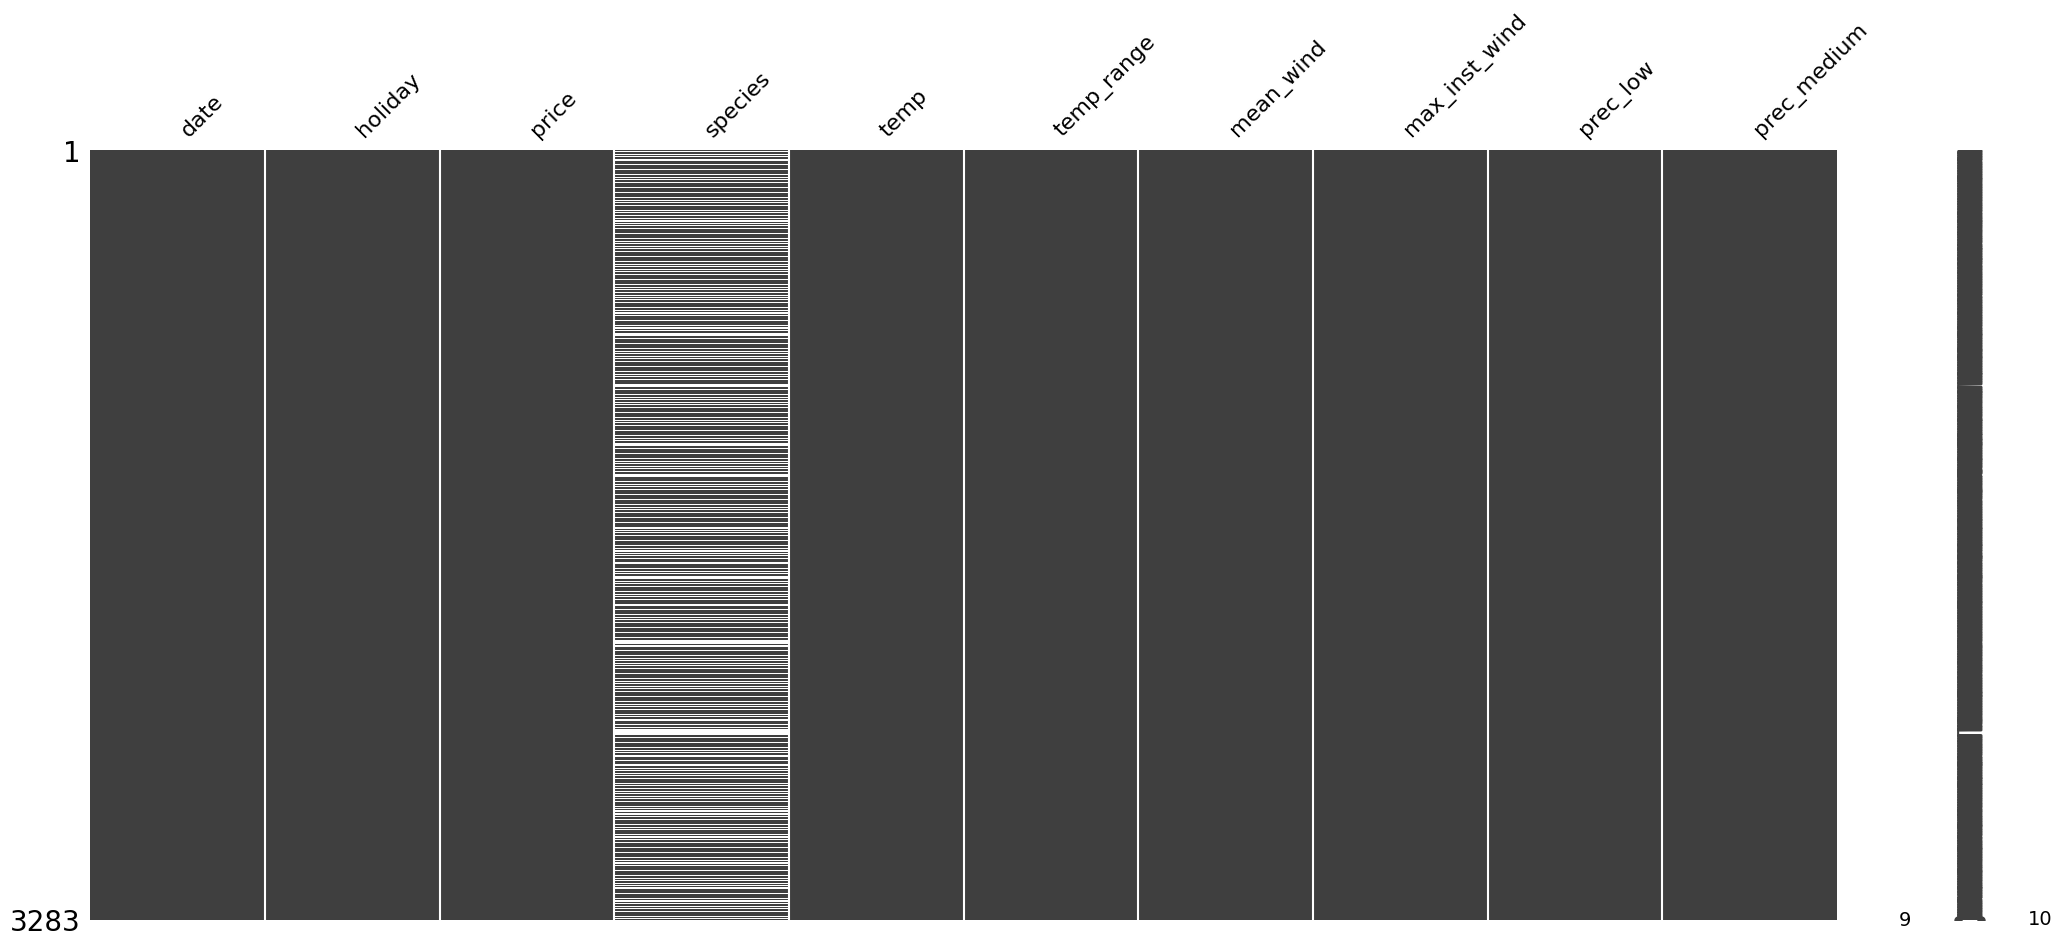

In [103]:
msno.matrix(apple_1st_by_day)

<Axes: >

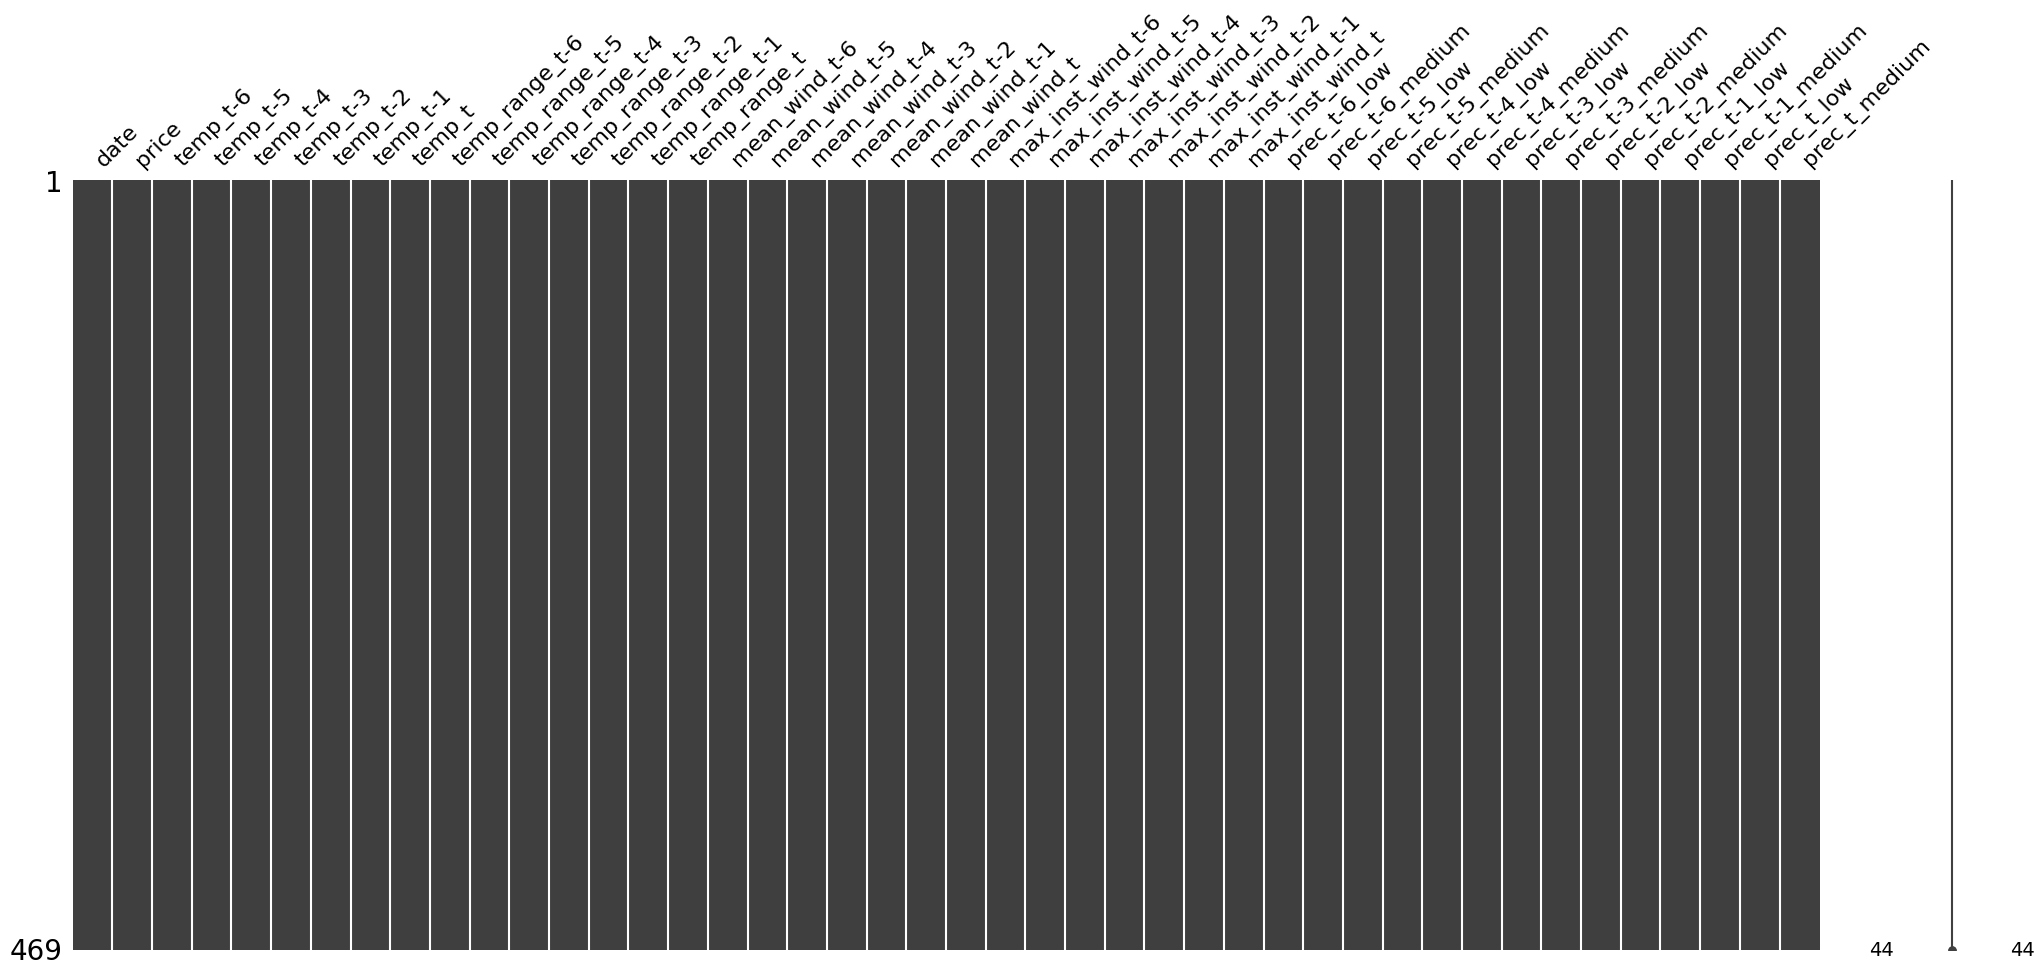

In [104]:
msno.matrix(apple_1st_by_week)